In [1]:
%matplotlib inline


# Density Estimation for a Gaussian mixture


Plot the density estimation of a mixture of two Gaussians. Data is
generated from two Gaussians with different centers and covariance
matrices.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

In [3]:
n_samples = 300
n_components = 5
np.random.seed(0)

In [4]:
'''
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])
'''

'\n# generate spherical data centered on (20, 20)\nshifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])\n\n# generate zero centered stretched Gaussian data\nC = np.array([[0., -0.7], [3.5, .7]])\nstretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)\n\n# concatenate the two datasets into the final training set\nX_train = np.vstack([shifted_gaussian, stretched_gaussian])\n'

In [5]:
gaussianMeans = [np.array([6 * i, 6 * i]) for i in range(n_components)]
gaussianList = [np.random.randn(n_samples, 2) + i for i in gaussianMeans]
X_train = np.vstack(gaussianList)

gaussianMeans

[array([0, 0]),
 array([6, 6]),
 array([12, 12]),
 array([18, 18]),
 array([24, 24])]

<ipython-input-6-bd7fd3e42b96>:15: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, shrink=0.8, extend='both')


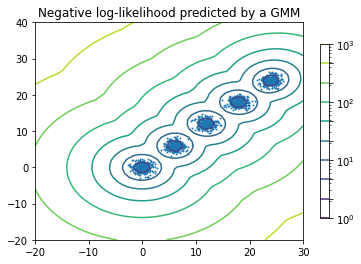

In [6]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=n_components, covariance_type='full')
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()